In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
df_ini = yf.download('^GSPC', '1970-01-01', '2022-12-31')
df_ini.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,0.0,93.540001,91.790001,93.000000,93.000000,8050000
1970-01-05,0.0,94.250000,92.529999,93.459999,93.459999,11490000
1970-01-06,0.0,93.809998,92.129997,92.820000,92.820000,11460000


In [3]:
df_ini = df_ini.drop(['Open', 'High', 'Low', 'Adj Close','Volume'], axis=1)
df_ini['Daily Pct Change'] = (df_ini.pct_change() * 100).round(2)
df_ini.head(3)

,Close,Daily Pct Change
Date,,
1970-01-02,93.000000,NaN
1970-01-05,93.459999,0.49
1970-01-06,92.820000,-0.68


In [4]:
full_date_range = pd.date_range(start='1970/1/1', end='2022/12/31', freq='D')
df = df_ini.reindex(full_date_range, fill_value='NaN').astype(float)
df['Year Later'] = df.index + pd.offsets.DateOffset(years=1)
df['Yr Later Close'] = np.nan
df.head(3)

,Close,Daily Pct Change,Year Later,Yr Later Close
1970-01-01,NaN,NaN,1971-01-01,NaN
1970-01-02,93.0,NaN,1971-01-02,NaN
1970-01-03,NaN,NaN,1971-01-03,NaN


In [5]:
years = df.index
end_date = pd.Timestamp('2023-01-01')

for year in years:
    yr_after = year + pd.offsets.DateOffset(years=1)
    if yr_after < end_date:
        df.loc[year, 'Yr Later Close'] = df.loc[yr_after, 'Close']
        
df = df[df['Year Later'] <= '2022-12-31']
df.tail(3)

,Close,Daily Pct Change,Year Later,Yr Later Close
2021-12-29,4793.060059,0.14,2022-12-29,3849.280029
2021-12-30,4778.729980,-0.30,2022-12-30,3839.500000
2021-12-31,4766.180176,-0.26,2022-12-31,NaN


In [6]:
df_ffill = df.ffill()
df_ffill.tail(3)

,Close,Daily Pct Change,Year Later,Yr Later Close
2021-12-29,4793.060059,0.14,2022-12-29,3849.280029
2021-12-30,4778.729980,-0.30,2022-12-30,3839.500000
2021-12-31,4766.180176,-0.26,2022-12-31,3839.500000


In [7]:
df_ffill['Yr Later Change'] = (((df_ffill['Yr Later Close'] - 
                                 df_ffill['Close']) / 
                                 df_ffill['Close']) * 
                                 100).round(2)
df_ffill.tail(3)

,Close,Daily Pct Change,Year Later,Yr Later Close,Yr Later Change
2021-12-29,4793.060059,0.14,2022-12-29,3849.280029,-19.69
2021-12-30,4778.729980,-0.30,2022-12-30,3839.500000,-19.65
2021-12-31,4766.180176,-0.26,2022-12-31,3839.500000,-19.44


In [8]:
df_merged= pd.merge(df_ini, df_ffill, right_index=True, 
                    left_index=True, suffixes=('_remove', ''))

# Remove the duplicate columns:
df_merged.drop([i for i in df_merged.columns if 'remove' in i],
               axis=1, inplace=True)
df_merged.head(3)

,Close,Daily Pct Change,Year Later,Yr Later Close,Yr Later Change
1970-01-02,93.000000,NaN,1971-01-02,NaN,NaN
1970-01-05,93.459999,0.49,1971-01-05,91.800003,-1.78
1970-01-06,92.820000,-0.68,1971-01-06,92.349998,-0.51


In [9]:
df_filtered = df_merged[df_merged['Daily Pct Change'] <= -3.50]
df_filtered.head(3)

,Close,Daily Pct Change,Year Later,Yr Later Close,Yr Later Change
1974-11-18,69.269997,-3.67,1975-11-18,91.000000,31.37
1982-10-25,133.320007,-3.97,1983-10-25,166.470001,24.86
1986-09-11,235.179993,-4.81,1987-09-11,321.980011,36.91


In [10]:
print((f"Average returns one year later = \
{df_filtered['Yr Later Change'].mean():.2f}%"))

Average returns one year later = 23.24%


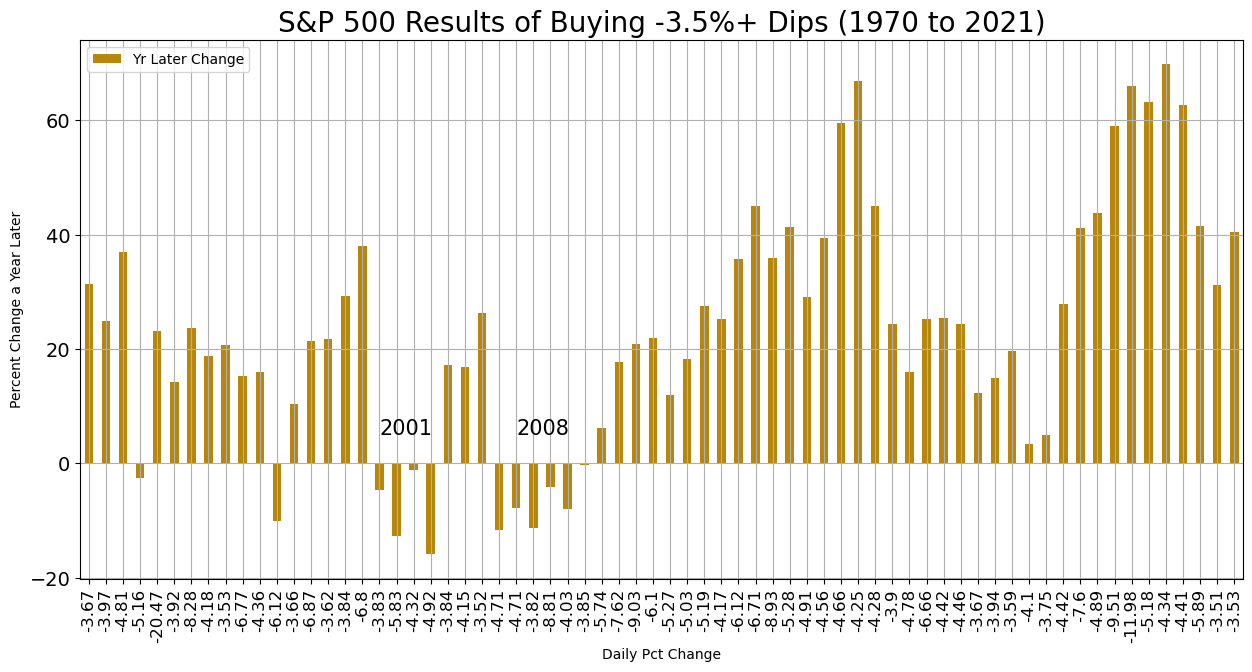

In [11]:
plt.rc('axes', labelsize=20, titlesize=20) # Fontsize of the x and y labels.
plt.rc('xtick', labelsize=12) # Fontsize of the x tick labels.
plt.rc('ytick', labelsize=14) # Fontsize of the y tick labels.

title = 'S&P 500 Results of Buying -3.5%+ Dips (1970 to 2021)'
chart = df_filtered.plot(kind='bar', 
                         x='Daily Pct Change', y='Yr Later Change', 
                         title=title, 
                         ylabel='Percent Change a Year Later', 
                         figsize=(15, 7), 
                         color='darkgoldenrod', 
                         grid=True)
chart.text(17, 5, '2001', fontsize=15)
chart.text(25, 5, '2008', fontsize=15);

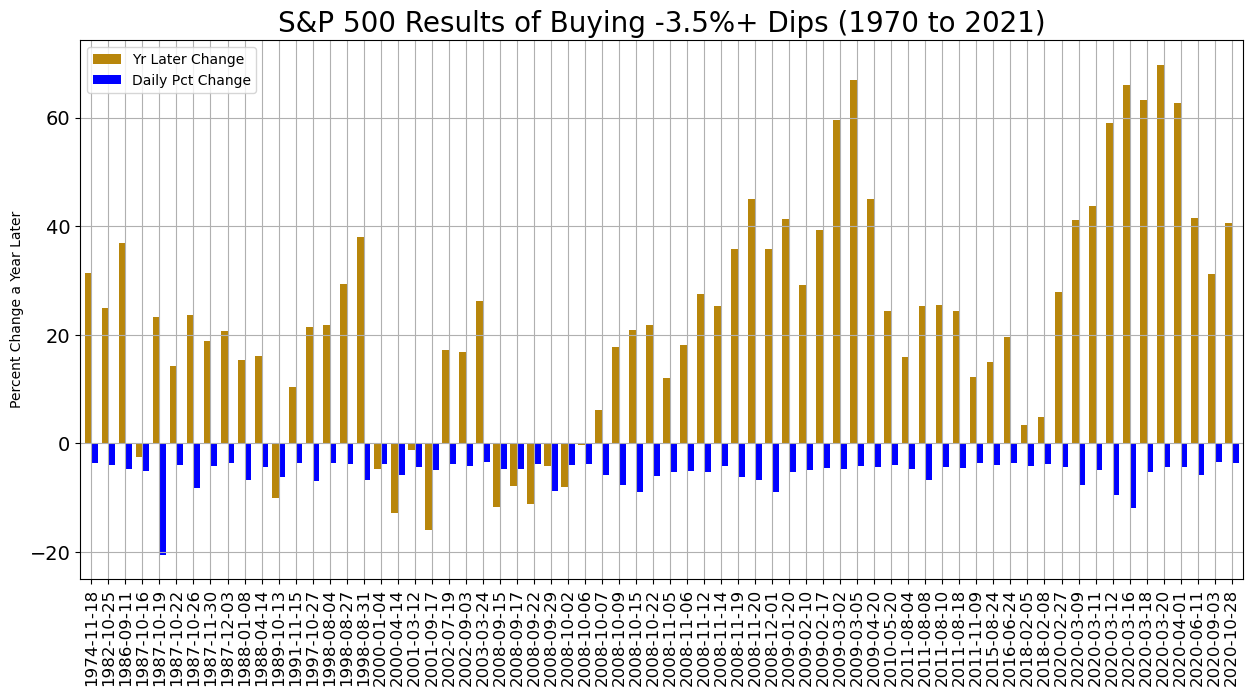

In [12]:
chart = df_filtered.plot(kind='bar', 
                         width=0.8, 
                         y=['Yr Later Change', 'Daily Pct Change'],
                         title=title, 
                         ylabel='Percent Change a Year Later', 
                         figsize=(15, 7), 
                         color=['darkgoldenrod', 'blue'], 
                         grid=True)   
chart.set_xticklabels([x.strftime("%Y-%m-%d") for x in df_filtered.index]);